In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

In [2]:
df = pd.read_csv('homeprices.csv')
df.head()

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000


In [3]:
from sklearn.linear_model import LinearRegression

In [6]:
model = LinearRegression()

In [7]:
model.fit(df[['area']],df.price)

LinearRegression()

In [8]:
model.coef_,model.intercept_

(array([118.29495955]), 257056.627255756)

In [10]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
model.predict([[3400]])

array([659259.48973242])

In [12]:
y_predicted = model.predict(df[['area']])

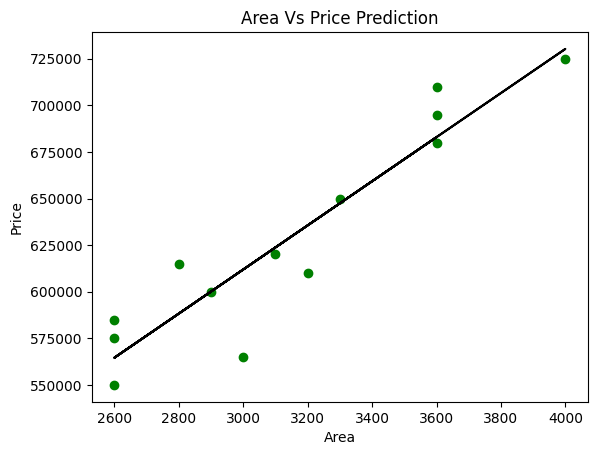

In [13]:
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Area Vs Price Prediction")
plt.scatter(df.area,df.price,color = 'green')
plt.plot(df.area,y_predicted,color="black")
plt.show()

In [16]:
dummies = pd.get_dummies(df.town)

In [17]:
dummies

,monroe township,robinsville,west windsor
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,1,0


In [20]:
merged = pd.concat([df,dummies],axis=1)

In [21]:
merged

,town,area,price,monroe township,robinsville,west windsor
0,monroe township,2600,550000,1,0,0
1,monroe township,3000,565000,1,0,0
2,monroe township,3200,610000,1,0,0
3,monroe township,3600,680000,1,0,0
4,monroe township,4000,725000,1,0,0
5,west windsor,2600,585000,0,0,1
6,west windsor,2800,615000,0,0,1
7,west windsor,3300,650000,0,0,1
8,west windsor,3600,710000,0,0,1
9,robinsville,2600,575000,0,1,0


In [22]:
final = merged.drop(['town','west windsor'],axis=1)
final.head()

,area,price,monroe township,robinsville
0,2600,550000,1,0
1,3000,565000,1,0
2,3200,610000,1,0
3,3600,680000,1,0
4,4000,725000,1,0


In [24]:
X = final.drop(['price'],axis = 1)
y = final.price

In [25]:
X

,area,monroe township,robinsville
0,2600,1,0
1,3000,1,0
2,3200,1,0
3,3600,1,0
4,4000,1,0
5,2600,0,0
6,2800,0,0
7,3300,0,0
8,3600,0,0
9,2600,0,1


In [26]:
y

0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
model = LinearRegression()

In [30]:
model.fit(X,y)

LinearRegression()

In [34]:
model.coef_,model.intercept_,model.score(X,y)

(array([   126.89744141, -40013.97548914, -14327.56396474]),
 249790.36766292527,
 0.9573929037221872)

### One Hot Encoder
Firstly we have to label encoding 

In [35]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [36]:
le = LabelEncoder()

In [37]:
df.head()

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000


In [38]:
df_le = df # new data frame for experiment

In [40]:
df_le['town']=le.fit_transform(df_le.town)

In [41]:
df_le.head()

,town,area,price
0,0,2600,550000
1,0,3000,565000
2,0,3200,610000
3,0,3600,680000
4,0,4000,725000


In [42]:
df_le['town'].unique()

array([0, 2, 1])

In [45]:
X = df_le.drop('price',axis=1)

In [46]:
X

,town,area
0,0,2600
1,0,3000
2,0,3200
3,0,3600
4,0,4000
5,2,2600
6,2,2800
7,2,3300
8,2,3600
9,1,2600


In [47]:
y = df_le.price

In [58]:
ohe = OneHotEncoder() # 0th column is categorical
dummy = ohe.fit_transform(X[['town']]).toarray()

In [56]:
X

,town,area
0,0,2600
1,0,3000
2,0,3200
3,0,3600
4,0,4000
5,2,2600
6,2,2800
7,2,3300
8,2,3600
9,1,2600


In [57]:
type(X)

pandas.core.frame.DataFrame

In [63]:
X

,town,area
0,0,2600
1,0,3000
2,0,3200
3,0,3600
4,0,4000
5,2,2600
6,2,2800
7,2,3300
8,2,3600
9,1,2600


In [64]:
dummy

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [67]:
X = X.join(dummy,axis = 1)

TypeError: DataFrame.join() got an unexpected keyword argument 'axis'

In [68]:
type(dummy)

numpy.ndarray

In [69]:
dummy = pd.DataFrame(dummy)

In [70]:
X = X.join(dummy)

In [71]:
X.head()

,town,area,0,1,2
0,0,2600,1.0,0.0,0.0
1,0,3000,1.0,0.0,0.0
2,0,3200,1.0,0.0,0.0
3,0,3600,1.0,0.0,0.0
4,0,4000,1.0,0.0,0.0


In [76]:
X.rename(columns={'2':'monre'})

,town,area,0,1,2
0,0,2600,1.0,0.0,0.0
1,0,3000,1.0,0.0,0.0
2,0,3200,1.0,0.0,0.0
3,0,3600,1.0,0.0,0.0
4,0,4000,1.0,0.0,0.0
5,2,2600,0.0,0.0,1.0
6,2,2800,0.0,0.0,1.0
7,2,3300,0.0,0.0,1.0
8,2,3600,0.0,0.0,1.0
9,1,2600,0.0,1.0,0.0
